In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
from PIL import Image
from ipywidgets import widgets
from IPython.display import display

%matplotlib inline 

In [2]:
#Odabir slike
name = widgets.Text()
display(name)
display("Unesite naziv slike")

'Unesite naziv slike'

In [3]:
#Ucitavanje slike
img = Image.open(name.value)
img.show()
img = np.array(img.convert('L'))
data = np.ravel(img).astype('float')
n = data.size

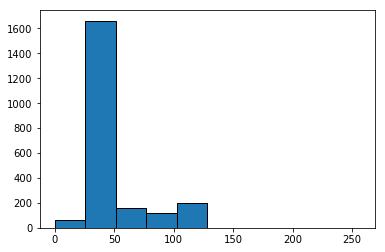

In [4]:
#Histogram
values, bins, _ = plt.hist(data,range=[0,256], ec='k', bins=10)

In [5]:
print('values',values)
print('bins',bins)

values [   65.  1662.   160.   117.   196.     0.     0.     0.     0.     0.]
bins [   0.    25.6   51.2   76.8  102.4  128.   153.6  179.2  204.8  230.4
  256. ]


In [6]:
#Odredjivanje broja segmenata k na osnovu histograma
getk = widgets.IntText()
display('Unesite vrednost k')
display(getk)

'Unesite vrednost k'

In [7]:
#incijalizacija parametara na osnovu histograma

In [8]:
k = getk.value
index = np.argsort(-values)

In [9]:
bin_list = []
for i in range(k):
    b = []
    
    for x in data:
        if(bins[index[i]] < x and x < bins[index[i]+1]):
            b.append(x)

    bin_list.append(b)

In [10]:
mu = np.zeros(k)
sigma = np.zeros(k)
for i in range(k):
    mu[i] = np.array(bin_list[i]).mean()
    sigma[i] = np.std(np.array(bin_list[i]))

In [11]:
gaussians = values[index[:k]]
s = np.sum(gaussians)
p = gaussians/s

In [12]:
#parametri
print('p',p)
print('sigma',sigma)
print('mu',mu)

p [ 0.77845433  0.09180328  0.07494145  0.05480094]
sigma [ 2.53481766  2.66138803  5.94157755  7.89302241]
mu [  40.41275572  105.56122449   71.8125       95.53846154]


In [13]:
#matrica P incijalizovana pocetnim verovatnocama p ili nulama ili jednakim verovatnocama
P = np.tile(p,[n,1]).T
P = np.zeros([k,n])
P[:,:]=1/k

In [14]:
#funkcija Gausove distribucije
def f(x,p,mu,sigma):
    sum = 0;
    for i in range (0,k):
        sum += p[i]*mlab.normpdf(x,mu[i],sigma[i])
    
    return sum

In [15]:
#inicijalizacija parametara

p_old = p.copy()
sigma_old = sigma.copy()
mu_old = mu.copy()
P_old = P.copy()

P_new = np.zeros(P_old.shape)
p_new = np.zeros(k)
sigma_new = np.zeros(k)
mu_new = np.zeros(k)

X = data

In [16]:
# E-M algoritam
for it in range(100): #broj iteracija
    
    # E - korak 
    for i in range (k):
        val = []
        for j in range(n):
            val.append( p_old[i] * mlab.normpdf(X[j],mu_old[i],sigma_old[i])/f(X[j],p_old,mu_old,sigma_old) )
        P_new[i] = val
    
    print(P_new)
    
    # M - korak
    
    for i in range (0,k):
        p_new[i] = np.sum(P_new[i])/n
        mu_new[i] = np.sum(P_new[i]*X)/(n*p_new[i])
        sigma_new[i] = np.sum((P_new[i]*(X-mu_new[i])**2))/(n*p_new[i])          

    # kriterijum zaustavljanja   
    if(np.allclose(P_old,P_new, rtol=0.00001)):
        break

    #azuriranje parametara
    p_old = p_new.copy()
    sigma_old = sigma_new.copy()
    mu_old = mu_new.copy()
    P_old = P_new.copy()


[[  9.99999996e-001   9.99999939e-001   9.99999830e-001 ...,
    9.99999459e-001   9.99999989e-001   9.99999939e-001]
 [  2.15660155e-145   1.89086321e-129   1.89702467e-125 ...,
    1.93090930e-121   1.96183616e-137   1.89086321e-129]
 [  3.56946021e-009   6.09956348e-008   1.70488733e-007 ...,
    5.41229755e-007   1.14385856e-008   6.09956348e-008]
 [  6.36590708e-014   9.96386827e-013   2.80944496e-012 ...,
    9.10821417e-012   1.90503785e-013   9.96386827e-013]]
[[  9.78537112e-01   9.78240610e-01   9.78063419e-01 ...,   9.77843417e-01
    9.78470192e-01   9.78240610e-01]
 [  8.59187617e-21   1.53626939e-18   5.37292374e-18 ...,   1.84591899e-17
    1.19057955e-19   1.53626939e-18]
 [  1.05444919e-02   1.05101044e-02   1.05521489e-02 ...,   1.06147431e-02
    1.04868488e-02   1.05101044e-02]
 [  1.09183962e-02   1.12492857e-02   1.13844322e-02 ...,   1.15418399e-02
    1.10429592e-02   1.12492857e-02]]
[[  9.92595194e-01   9.92542489e-01   9.92514372e-01 ...,   9.92476427e-01
   

In [17]:
# konacan izlaz, za svaki piksel odredjeno kojem segmentu od 0 do k pripada sto se koristi za bojenje konacne slike
args = np.argmax(P_new,axis=0)

In [18]:
#bojenje slike

In [19]:
colors = [[255,0,0],[0,255,0],[0,0,255],[255,255,0],[255,0,255],[0,255,255],[255,255,255],[0,0,0],[125,125,125]]

In [20]:
res = []
for x in args:
    for i in range(k):
        if(x == i):
            res.append(colors[i])

In [21]:
a,b = img.shape
out_data = np.array(res).astype('uint8').reshape([a,b,3])

In [22]:
out = Image.fromarray(out_data,'RGB')
out.save('izlaz.png','png')
out.show()